# MediaPipe 

[MediaPipe homepage](https://mediapipe.dev)

<font size="4">Live ML Anywhere</font>

<br/>

<font size="3">
MediaPipe offers open source cross-platform, customizable ML solutions for live and streaming media.
    </font>



![MP](./images/mp_overview.png)

## Learning Resources


<font size="4">Nicholas Renotte YouTube Series</font>

Has a number of great videos on how to use the Mediapipe library

- https://www.youtube.com/watch?v=pG4sUNDOZFg

- https://www.youtube.com/watch?v=06TE_U21FK4

- https://www.youtube.com/watch?v=vQZ4IvB07ec&list=RDCMUCHXa4OpASJEwrHrLeIzw7Yg&start_radio=1&t=32



## Pose Detection

<span style="font-family:overpass;font-size:16px;color:#303030;font-weight:300;">This section uses a series of pre-trained models from MediaPipe that detects and reports data on the position of the human body.</span>

<span style="font-family:overpass;font-size:16px;color:#303030;font-weight:300;">What we do with this data is up to us and the problem we are trying to solve.</span>



<span style="font-family:overpass;font-size:16px;color:#303030;font-weight:300;">Real-time human pose estimation can and will play an ever increasing role in society.</span>


<span style="font-family:overpass;font-size:16px;color:#303030;font-weight:300;">From quantifying physical exercises and movements , to sign language, to virtual control of physcial objects - how the body interfaces with the real world can be detected.</span>




<center><img src="./images/pose_1.jpg" alt="FacePicture" style="width: 80%;"/></center>


<br>
<br>
<center>
<span style="font-family:overpass;font-size:16px;color:#303030;font-weight:300;">
Section leverages MediaPipe Algorithms
</span>
<br>
<br>


<span style="font-family:overpass;font-size:20px;color:#303030;font-weight:300;">
Once we know the pose of a human, what can we do with that?
</span>



</center>

<br>

<br>

<center><font size="3">https://mediapipe.dev</font></center>


https://youtu.be/Oi-NkLqv82w



## Pose Detection - How does it work?

<span style="font-family:overpass;font-size:16px;color:#303030;font-weight:300;">MediaPipe library will detect 32 different landmarks on the body.  The MediaPipe machine learning library will return the X,Y,Z location in the image for each of the landmarks below.</span>





[MediaPipe Pose Documentation](https://google.github.io/mediapipe/solutions/pose.html)

![PoseLandMarks](./images/pose_landmarks.png)

<span style="font-family:overpass;font-size:16px;color:#303030;font-weight:300;">We train our own machine learning model to collect the X,Y,Z values and assign a pose label to the values.  Later we can use our model to predict if a pose is one that we trained the model on.</span>

# Goal



<center><font size="4">The goal is to use arm positions to detect the YMCA dance moves</font></center>

For this problem, not all of the landmarks are needed nor desired as the additional landmarks only add 'noise' to the model and are not relevant to the stated goal of using arm positions to to detect YMCA dance moves.

To that end the only landmarks of interest are:

<b>Right Arm</b>
Landmarks:  12, 14, 16

<b>Left Arm</b>
Landmarks: 11,13,15

![PoseARMLandMarks](./images/pose_arms_landmarks.png)

The landmarks that are collected will be:

* right shoulder
* right elbow
* right wrist

* left shoulder
* left elbow
* left wrist

# Collect Training Data

The first step is to collect training data.

This process involves capturing frames from a video webcam feed and running the images through the MediaPipe pose detection library to extract the landmarks of interest.

For each landmark there are 3 values ( X, Y, Z ) values meaning that while capturing video frames, each frame will produce 18 values plus the label.


## 01_pose_training_data.py

The `01_pose_training_data.py` script will be used to collect images from the webcam, extract the landmark values and write the values to a csv file.

This script will collect pose data.

* Parameters

`--class-name`

Name of the target or class to associate with the collected pose data

`--collect-for`

How long should frames from the video feed be collected and converted to pose data

`--start-delay`

How many seconds to delay before starting to collect data.  This gives the person time to get into position before data is collected.  Default value is 5 seconds.

`--file-name`

Name of the csv file to write the pose data to.  This file is appended to if it exists

`--dry-run`

If present as an option, the script will not save the data but just display the overlay results in a window



* Usage:

```text
python pose_training_data.py --class-name Y

python pose_training_data.py --class-name Y --dry-run --collect-for 10

```

### Y - Pose

![YPose](./images/Y-before-after.png)

### M - Pose

![YPose](./images/M-before-after.png)

### C - Pose

![YPose](./images/C-before-after.png)

### A - Pose

![APose](./images/A-before-after.png)

# Review Pose Data

In [4]:
import pandas as pd
import cv2
from matplotlib import pyplot as plt

In [16]:
df = pd.read_csv('./data/ymca_training.csv', header=None)
# Changing columns name with index number
df = df.rename(columns={
    df.columns[0]: 'target',
    1:'p11x',
    2:'p11y',
    3:'p11z',
    4:'p12x',
    5:'p12y',
    6:'p12z',
    7:'p13x',
    8:'p13y',
    9:'p13z',
    10:'p14x',
    11:'p14y',
    12:'p14z',
    13:'p15x',
    14:'p15y',
    15:'p15z',
    16:'p16x',
    17:'p17y',
    18:'p18z',




    
})

## Raw Collected Pose Data

In [17]:
df.shape

(2735, 19)

In [18]:
df.sample(frac=0.005, replace=False, random_state=1)

,target,p11x,p11y,p11z,p12x,p12y,p12z,p13x,p13y,p13z,p14x,p14y,p14z,p15x,p15y,p15z,p16x,p17y,p18z
896,M,0.567752,0.620147,-0.164415,0.394914,0.618918,-0.144372,0.698677,0.565708,-0.461657,0.260687,0.521692,-0.277798,0.594542,0.446826,-0.649715,0.369280,0.413383,-0.182674
1027,C,0.563915,0.786229,0.138383,0.451495,0.594477,0.043768,0.672883,0.959631,0.204181,0.489982,0.335736,-0.017881,0.794140,0.924750,0.095809,0.633285,0.296833,0.116368
558,M,0.545435,0.757747,-0.151171,0.440152,0.757147,-0.117277,0.622376,0.707506,-0.368858,0.356301,0.735197,-0.313894,0.556338,0.634692,-0.504986,0.415507,0.651016,-0.484718
2706,M,0.605701,0.408887,-0.110125,0.421443,0.398769,-0.080631,0.743303,0.421836,-0.249555,0.271499,0.334893,-0.177506,0.653866,0.297593,-0.275344,0.373222,0.231528,-0.021378
428,Y,0.558019,0.686046,-0.141180,0.447471,0.674520,-0.068280,0.624834,0.602339,-0.232754,0.387985,0.564974,-0.114158,0.693202,0.450341,-0.399233,0.333424,0.404857,-0.226715
1986,dance,0.598075,0.527174,-0.083572,0.474060,0.521403,-0.030073,0.641815,0.700311,-0.142961,0.438736,0.679930,0.001761,0.586733,0.712991,-0.396178,0.437776,0.801869,-0.179724
2273,dance,0.588593,0.492704,-0.007067,0.443694,0.496894,-0.104527,0.624901,0.683330,0.098947,0.410737,0.725433,-0.204988,0.627050,0.806188,-0.137393,0.463769,0.739828,-0.520728
797,M,0.495937,0.647322,-0.139936,0.329644,0.635410,-0.101005,0.620889,0.610440,-0.348677,0.192720,0.518063,-0.104414,0.522985,0.488209,-0.452987,0.320740,0.445682,0.193605
1668,A,0.553757,0.732276,0.007280,0.425693,0.715008,-0.100446,0.593891,0.564247,-0.070018,0.422141,0.509337,-0.311754,0.544431,0.361548,-0.207076,0.493884,0.333922,-0.378589
2352,M,0.610265,0.339345,-0.168356,0.408802,0.334736,-0.147191,0.755371,0.298825,-0.446948,0.253327,0.239557,-0.380421,0.646535,0.190593,-0.606047,0.370547,0.140310,-0.322097


## Review Collected Data

In [19]:
def draw_pose_data(target_label):
    f, axarr = plt.subplots(1,2,figsize=(15,15))
    pose_image = cv2.imread(f'./data/{target_label}.png')
    img = cv2.cvtColor(pose_image, cv2.COLOR_BGR2RGB)
    axarr[0].imshow(img)
    
    x_y_values = [(1,2), (4,5), (7,8), (10,11), (13,14), (16,17)]
    down_points = df.query(f'target == "{target_label}"')
    for down_point in down_points.iterrows():
        for x_y in x_y_values:
            x,y = list(down_point[1].values[x_y[0]: x_y[1]+1])
            img_x, img_y = pose_image.shape[1]*x, pose_image.shape[0]*y
            img = cv2.circle(img, (int(img_x),int(img_y)), 2, (255,0,0), 2)

    axarr[1].imshow(img)

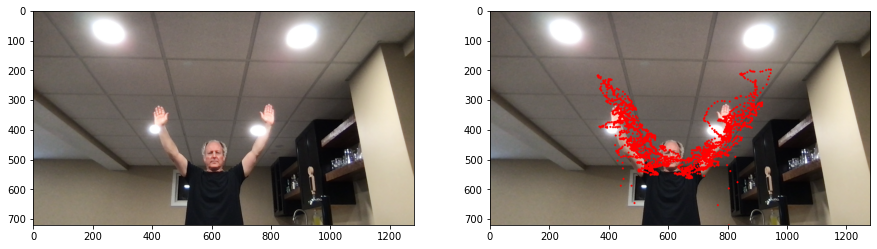

In [20]:
draw_pose_data('Y')

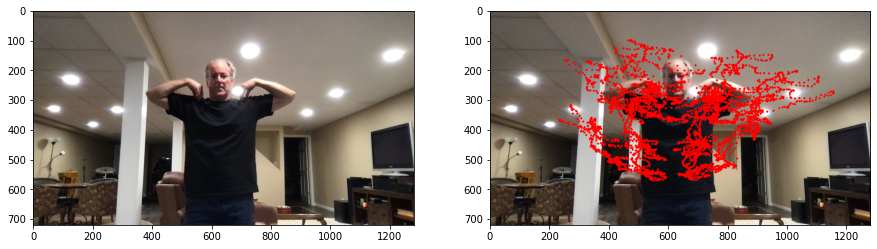

In [21]:
draw_pose_data('M')

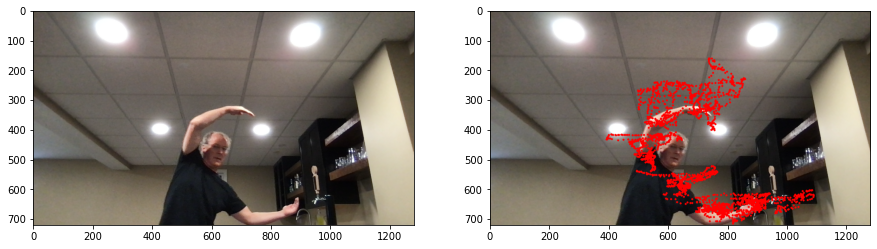

In [22]:
draw_pose_data('C')

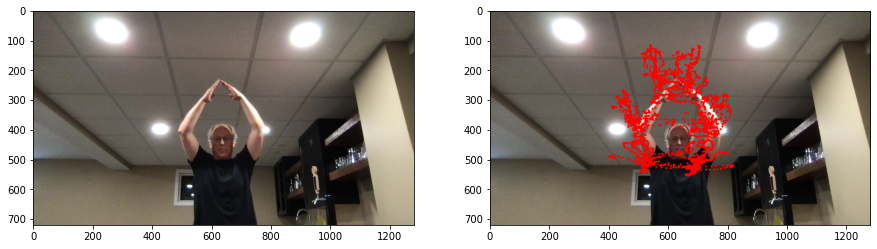

In [23]:
draw_pose_data('A')

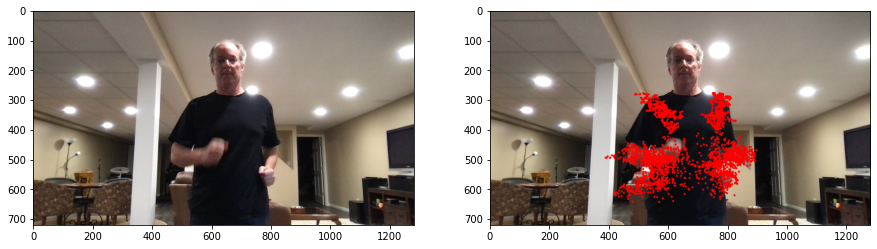

In [24]:
draw_pose_data('dance')

# Train a model

Now that we have a dataset we can start to train a model to predict the target value

## 02_pose_model_training.py

Script used to run through a number of Scikit-Learn models to determine the best model for the provided data.

This script will train numerous models on the YMCA pose data.

* Parameters

`--training-data`

Full path to the csv training data

`--model-name`

Name of the best saved model file.  Do not include a suffix, .pkl will be added on save

Default value is: best_ymca_pose_model


* Usage:

```text
python 02_pose_model_training.py --training-data ./data/ymca_training.csv


```

When the training is done the best model is saved to use in the prediction script

# Predict using the best training model

## 03_pose_predictions.py

Script use new video frames from the webcam to predict a pose from the specified model.

This script will train numerous models on the YMCA pose data.

* Parameters

`--model-name`

Full path to the pickled model file without the pkl extension

Default value is:  best_ymca_pose_model

* Usage:

```text
python 03_pose_predictions.py --model-name best_ymca_pose_model


```